# puzzles 2024

带$\star$的是我自己出的题目，其他为觉得不错的题目

## $\star$ 带记忆的硬币 

有一枚硬币很特别，每次的正反面跟前面的状态有关，如果上一次是正面，则下一次为正面的概率为$p$，为反面的概率为$1-p$。现在已知第一次为正面，求第$n$次为正面的概率

### solve

方法一：

设第$n$次为正面的概率为$P_n$，则有$P_n = p P_{n-1} + (1-p)(1-P_{n-1})$，变换得到$P_n - \frac{1}{2} = (2p-1)(P_{n-1} - \frac{1}{2})$，求得$P_n = \frac{1}{2}(1 + (2p-1)^{n-1})$


方法二：

标准马尔科夫过程，转移矩阵

$$
M = 
\left(
\begin{array}{l}
p & 1-p \\
1-p & p
\end{array}
\right)
$$

特征值$\lambda_1 = 1, \lambda_2 = 2p-1$，特征向量为$a_1 = \frac{1}{\sqrt{2}}[1,1]^T,a_2=\frac{1}{\sqrt{2}}[1,-1]^T$

令$A = [a_1,a_2]$

$$
M = 
A
\left(
\begin{array}{l}
1 & 0 \\
0 & 2p-1
\end{array}
\right)
A^T

$$

$$
M^{n-1} = 
A
\left(
\begin{array}{l}
1 & 0 \\
0 & (2p-1)^{n-1}
\end{array}
\right)
A^T
$$

初始状态$S_1 = [1,0]^T$，所以$S_n = M^{n-1} S_1 = \frac{1}{2}[1+(2p-1)^{n-1}, 1-(2p-1)^{n-1}]^T$

------------

## 猜数字游戏

从1到1000中任意取一个数字，让你来猜。每次你猜一个数字，同时我会告诉你结果是大了还是小了，还是一样。如果一样，游戏就结束。问在最优的策略下，你最少准备多少钱才能够保证一定可以猜到正确的数字

有下面几种情况

1. 无论猜的大了还是小了，都要支付1块钱，

2. 如果猜大了，支付2块钱，猜小了，支付1块钱

3. 如果猜大了，支付1块钱，猜小了，支付2块钱

### solve

设有n个数字，目标数字为t，如果第一次取x，如果t < x，则需要的费用为L，如果t > x，需要的费用为R，则有

$f(n,L,R) = max(f(x-1,L,R)+L, f(n-x,L,R)+R)$

这是一个dp问题，可以递归求解。但是题目中的问题的特点是，$|L-R|<=1$，这就可以有解析的做法

以情况2为例，写出前几项

$f_1=0,f_2=1,f_3=2,f_4=2,f_5=3,f_6=3,f_7=3,f_8=4,f_9=4,f_{10}=4,f_{11}=4,f_{12}=4,...$

即$f = 0,1,2,2,3,3,3$

可以发现相同数字作为一组的话，那么每组的大小序列是一个Fabonacci数列，下面证明这一点

$f_n = max(f_a + 2, f_b + 1)$，其中$a+b=n-1$，而因为前面的是+2,后面+1，所以$a < b$。

所以图像就是从n之前的$f_n$中找到两个数，使得$a+b=n-1$，同时使得$max(f_a+2,f_b+1)$最小，以上面序列$f$为例，要求$f_8$，可以选择$f_3+f_4$，或者$f_2+f_5$,显然$f_2+f_5$不行，因为结果由最大的值决定

所以我们只能选择同一组或者相邻两组的数来构造，考虑下面4组，每组的元素个数为$a,b,c,d$

$d$组中的数字，要么（1）都选自b组；（2）一个选自b，一个选自c

$a,b$组可以组成的最大index是 $i_1 = a + (a+b)$，这一部分属于$c$组

$b,c$组可以组成的最大index是 $i_2 = (a+b) + (a+b+c)$

所以$d = i_2 - i_1 = b + c$，得证。


既然是个Fabonacci序列，问题就简单了，设序列的和为$S_n$，即找$S_n >= 1000$的$n$的最小值，$ans = n-1 = 14$


In [5]:
fs = [1,1]

while sum(fs) < 10:
    fs.append(fs[-1]+fs[-2])

ans = len(fs) - 1

print(fs)
print(f'ans = {ans}')

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
ans = 14


--------------

## 伊藤积分问题

令$W_t$ 为标准布朗运动，定义随机变量

$X = \int_{0}^{T} W_t dt$，$Y = \int_{0}^{T} t dW_t$

证明 $corr(X,Y) = \frac{1}{2}$

### solve

伊藤积分忘记了。。。但是可以从定义出发直接推导

将积分换成求和

$X = \Sigma_{i=1}^{N} \Sigma_{j=1}^{i} w_i \frac{T}{N}$

求和写成二维的形式

$$
w_1 + \\
w_1 + w_2 + \\
w_1 + w_2 + w_3 + \\
...
$$

所以 $X = \frac{T}{N}\Sigma_{i=1}^{N} (N-i+1)w_i$

$Y = \Sigma_{i=1}^{N} i \frac{T}{N} w_i$

显然有 $E(X) = 0, E(Y) = 0$，所以$corr(X,Y) = \frac{XY}{\sigma_X \sigma_Y}$

$E(XY) = \frac{T^2}{N^2} \Sigma (N-i+1)i E(w_i^2) = \frac{T^2}{N^2} \Sigma (N+1)i - i^2$

$\sigma_X^2 = \frac{T^2}{N^2}\Sigma(N-i+1)^2 = \frac{T^2}{N^2} \Sigma [ (N+1)^2 - 2(N+1)i + i^2 ]$

$\sigma_Y^2 = \frac{T^2}{N^2} \Sigma i^2$

所以$corr(X,Y) = \frac{\Sigma (N+1)i - i^2}{\sqrt{\Sigma(N+1)^2 - 2(N+1)i + i^2}\sqrt{\Sigma i^2}} = \frac{\frac{1}{2}N(N+1)^2 - \frac{1}{6}N(N+1)(2N+1)}{\sqrt{\frac{1}{6}N(N+1)(2N+1)}\sqrt{\frac{1}{6}N(N+1)(2N+1)}}$

因为$N->+\infty$，只需要计算上下求和中最高次的系数即可，即 $corr(X,Y) = \frac{\frac{1}{2} - \frac{1}{6}\times 2}{\frac{1}{6}\times 2} = \frac{1}{2}$


**求和公式**

<img src='resources/04.png' width=500px />

-------------------

## 寻找反例

给一个数字字符串，比如123983098，在中间加入小于号(<)，使得整个式子成立，并且使得插入的‘<’个数最大。如果使用贪心的做法，是不是对的？如果不对，请举出反例

比如123983098按照贪心的结果就是1<2<3<9<83<098

### solve

就是构造 a<bc<def 同时 ab<cd<ef 都成立的，第二种肯定有优势，因为第三个数小

反例：52818990

贪心做法：5<28<18990

最优做法：52<81<89<90

------------------

## $\star$ 缠论问题1

一个随机序列，每次都是在[0,1]之间均匀随机取值。如果取到的数比前面的数小，就停止，并且把这个数字采样。求采样的分布

### solve

设第一个数为a，第二个为b，也就是求数对(a,b)，满足(a>b)的所有里面，b的分布

$P(b<x|a>b) = \frac{P(b<x,a>b)}{P(a>b)} = \frac{\int_{b<x,a>b} 1 dadb}{P(a>b)}$

其中积分区域如下，所以结果就是 $P(b<x|a>b) = \frac{(1-x+1)x/2}{0.5} = 2x-x^2$

<img src='resources/05.png' width='200px' />

所以概率密度函数为$p(x) = 2 - 2x$

---------------------

## $\star$ 缠论问题2

考虑如下随机过程

<img src='resources/06.png' width=500px />

每一步在[0,1]之间均匀随机取值，取的值为上下移动的数值。其中奇数步向上移动，偶数步向下移动。如果奇数步在0轴以上，或者偶数步在0轴以下，就继续这个过程，否则就停止。例如上图中是在第7步的时候停止，因为第7步在0轴以下。此时再以6,7作为起始点，不断重复这个过程，而前面0-5就为一个中枢。停止时最后一步取得数值作为采样（或者也可以称为一个中枢的开始），上图就是$y_7 - y_6$作为采样数值

问：

1. 采样数值的分布（即中枢高度的分布，上图中$y_7 - y_6$）

2. 采样步数的分布（即中枢长度的分布，上图第一个中枢长度记为5-0=5）



### solve

每一步只与上一步的位置有关系，而上一步所处的位置(即奇数步在0轴以上，偶数步在0轴以下)为 奇数步为[0,1]，偶数步为[-1,0]，不妨把偶数步也记为[0,1]，考虑到对称性，这两个分布应该是一样的，设为$f(x)$

如下图所示，上一步位置为$a$，这一步位置为$c$，令$F(x) = P(c < x) = \int_0^{x} f(x)$

<img src='resources/07.png' width=500px />

又因为$a$到$c$的差值为$b$,是在[0,1]之间均匀采样，概率密度为1，积分区域如下图所示,因此就有

$F(x) = \frac{\int_0^1 f(a)da \int_{a}^{min(1,a+x)} 1 db}{\int_0^1 f(a)da \int_a^{1} 1 db} = \frac{ \int_0^{1-x} f(a)x da + \int_{1-x}^1 f(a)(1-a)da } {\int_0^{1} a f(a) da}$

<img src='resources/08.png' width=300px />

两边对$x$求导得到$f(x) = \frac{\int_0^{1-x} f(a)da - xf(1-x) + f(1-x)x}{\int_0^{1} a f(a) da} = \frac{\int_0^{1-x} f(a)da }{\int_0^{1} a f(a) da} = \frac{F(1-x)}{\int_0^{1} a f(a) da}$ 

边条件 $F(0) = 0, F(1) = 1$

令分母$\int_0^1 a f(a) da = A$，就有

$$

AF(1-x) = f(x) \\
AF(x) = f(1-x)

$$

两边求导得

$$

-Af(1-x) = f'(x) \\

A f(x) = -f'(1-x)

$$

将第一个式子两边再对x求导，得 $Af'(1-x) = f''(x)$，带入第二个式子就有

$-A^2f(x)=f''(x) => f''(x) + A^2 f(x) = 0$

是个二阶常微分方程，带入通项公式和边条件，解得

$f(x) = \frac{\pi}{2}cos(\frac{\pi}{2} x)，F(x) = sin(\frac{\pi}{2} x)$  

目标是求采样数值的分布，而$f(x)$是采样前一步数值的分布，设采样数值的分布为$g(x)，G(x) = P(c<x) = \int_0^x f(x) dx$，如下图$c$与$a$都在0轴上方

<img src='resources/09.png' width=500px />

就有，积分区域如下图

$G(x) = \frac{\int_0^1 f(a) da \int_0^{min(a,x)} 1 db } {\int_0^1 f(a)da \int_0^{a} 1 db} = \frac{\int_0^x f(a)a da + \int_x^1 x f(a) da}{\int_0^1 f(a)a da}$


<img src='resources/10.png' width=300px />


两边对$x$求导，带入前面$f(x)=\frac{\pi}{2}cos(\frac{\pi}{2} x)$ 可解得

$g(x) = \frac{\pi}{\pi-2}(1 - sin(\frac{\pi}{2} x))$，即第一问中枢高度的分布


中枢形成是一个递归过程，如果某一次回踩与中枢有交集，则中枢长度加1，又从头开始了。因此设中枢长度为1的概率为$p_1$，中枢长度为2的概率就是$p_2 = (1-p_1)*p_1$，$p_3 = (1-p_1)^2 p_1$...

长度为$i$的概率为$p_i = (1-p_1)^{i-1}p_1$，因此只需要求得$p_1$即可


考虑如下图所示的过程

<img src='resources/11.png' width=300px />

中枢高度a的分布已知，即$g(x)$，后续$b,c$为连续两次在[0,1]上均匀随机采样，且要求$b-c>a$，因此其概率为

$p_1 = \int_0^1 g(a)da \int_{b-c>a,0<b,c<1} 1 db dc = \int_0^1 g(a) \frac{(1-a)^2}{2} da = \int_0^1 \frac{\pi}{\pi-2}(1 - sin(\frac{\pi}{2} a)) \frac{(1-a)^2}{2} da = 0.2927$

积分区间为

<img src='resources/12.png' width=300px />


所以长度为i的中枢概率为$p_i = 0.2927(1-0.2927)^{i-1}$


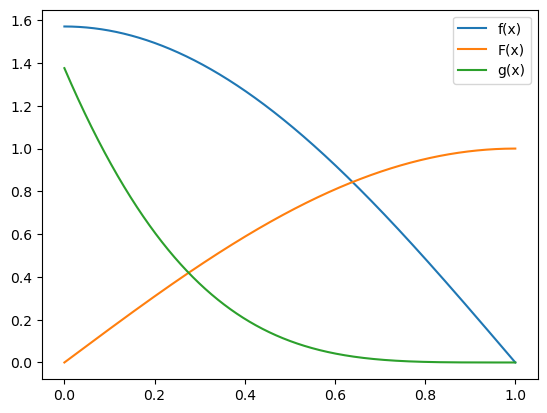

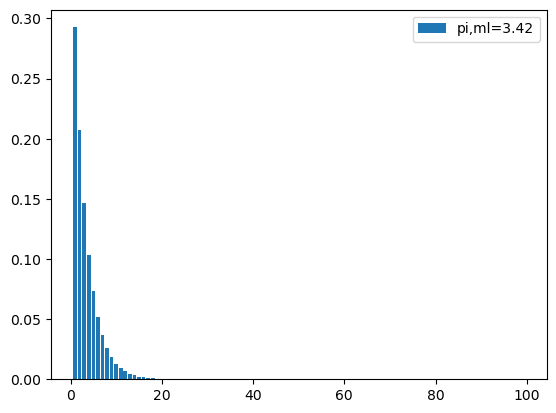

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x = np.linspace(0,1,N)

# f(x) 分布
fx = math.pi/2 * np.cos(math.pi/2 * x)
Fx = np.sin(math.pi/2*x)

# 中枢高度分布g(x)
gx = (math.pi/(math.pi-2))*(1 - np.sin(math.pi/2 * x)) * (1-x)**2 / 2

plt.plot(x, fx, label='f(x)')
plt.plot(x, Fx, label='F(x)')
plt.plot(x, gx, label='g(x)')
plt.legend()
plt.show()


# 中枢长度分布

ls = np.array(range(1,100))
p1 = 0.2927
pi = (1-p1)**(ls-1)*p1
ml = np.sum(pi*ls)
plt.bar(ls, pi,label=f'pi,ml={ml:.2f}')
plt.legend()
plt.show()


------------------

## 随机序列比大小

设随机序列$P(t) = P(t-1) + rand()$为一个随机游走序列

1. 记 $T_1={t:P(t)<P(t+1)}, T_2={t:P(t)>P(t+1)}$

    $V_1=mean(\{P(t):t\in T_1\}), V_2=mean(\{P(t):t\in T_2\})$

    问$D_1=E(V_2-V_1)$的符号

2. 记 $T_3={t:P(t)<P(t-1)}, T_4={t:P(t)>P(t-1)}$

    $V_3=mean(\{P(t):t\in T_3\}), V_4=mean(\{P(t):t\in T_4\})$

    问$D_2=E(V_4-V_3)$的符号，及$D_1 == D_2 ?$

### solve

在第1个问题中，如下图所示，$T_1$取的是局部最小值加上升部分，$T_2$取的是局部最大值加下降部分。上升部分和下降部分的均值应该是一样的。$T_2$加上局部最大值应该是比$T_1$大的，因此$D_1 > 0$

而在第2问中，其实就相当于把序列逆序之后和第1问是一样的。而对于随机游走，是没有方向性的，所以 $D_2 = D_1$

<img src='resources/13.png' width=400px />


上面是一个定性的讨论，下面定量计算这个值

$E(V_2 - V_1) = E(\frac{S^+}{N^+} - \frac{S^-}{N^-}) = E(\frac{S^+}{N^+}) - E(\frac{S^-}{N^-})$

其中$N^+ + N^- = N$

由于取期望不好计算，根据大数定理，可以看作取了很多$M$个样本的均值，即

$E(V_2 - V_1) = \frac{\sum^M_{i=1} S^+_i}{\sum^M_{i=1} N^+_i} - \frac{\sum^M_{i=1} S^-_i}{\sum^M_{i=1} N^-_i}$

考虑到$E(N^+) = E(N^-) = \frac{N}{2}$，上式化为

$E(V_2 - V_1) = \frac{E(S^+(N))M}{M \frac{N}{2}} - \frac{E(S^-(N))M}{M \frac{N}{2}} = \frac{E(S^+(N))}{\frac{N}{2}} - \frac{E(S^-(N))}{\frac{N}{2}} = \frac{2E(S^+(N)) - E(S(N))}{\frac{N}{2}}$

设以$a$起始序列，长度为$N$的值为$E(a,N)$，考虑第2个数为$b$，随机变量分布为$f(x)$

$E(b,N-1) = \frac{2E(S_{N-1}^+) - E(S_{N-1})}{\frac{N-1}{2}}$（注：此时$S$的含义为以$b$开头序列的和）

若 $b<a$，此时$a$归到$S^+$内，则

$E(a,b,N) = \frac{2E(S_{N-1}^+ + a) - E(S_{N-1})}{\frac{N}{2}} = \frac{2E(S_{N-1}^+) - E(S_{N-1}) + 2a}{\frac{N}{2}} = E(b,N-1) \frac{N-1}{N} + \frac{4a}{N} $

同理，若 $b>a$，此时$a$归到$S^-$内，则

$E(a,b,N) = E(b,N-1) \frac{N-1}{N} - \frac{4a}{N}$

因此


\begin{equation}
\begin{aligned}

E(a,N) 

&= \int_{b<a} (E(b,N-1)\frac{N-1}{N} + \frac{4a}{N}) f(b)db + \int_{b>a} (E(b,N-1)\frac{N-1}{N} - \frac{4a}{N}) f(b)db \\

&= E(N-1)\frac{N-1}{N} + P(<a)\frac{4a}{N} - P(>a)\frac{4a}{N} \\

&= E(N-1)\frac{N-1}{N} + (2P(<a) - 1)\frac{4a}{N} 

\end{aligned}
\end{equation}

因此就有

\begin{equation}
\begin{aligned}

E(N) 

&= \int_a E(a,N) f(a)da = E(N-1)\frac{N-1}{N} + \frac{8}{N} \int_a P(<a)f(a)da \\

& NE(N) = (N-1)E(N-1) + 8\int_a P(<a)f(a)da \\

& NE(N) - (N-1)E(N-1) = 8\int_a P(<a)f(a)da

\end{aligned}
\end{equation}

这是一个递推公式，求得其通项为 $N E(N) = (N-1) 8\int_a P(<a)f(a)da $，积分项为常数，就有

$$

E(N) = \frac{N-1}{N} 8\int_a P(<a)f(a)da

$$

下面以正态分布$N(0,1)$做验证

In [15]:
import numpy as np
import pandas as pd

N = 10000000

# 直接验证 
x = pd.Series(np.random.normal(0,1,N))
V1 = x[x<x.shift(-1)].mean()
V2 = x[x>x.shift(-1)].mean()
D1 = V2-V1

V3 = x[x<x.shift(1)].mean()
V4 = x[x>x.shift(1)].mean()
D2 = V4-V3

print(f'直接验证结果: D1={D1:.5f}, D2={D2:.5f}')


# 理论计算
x = np.linspace(-100,100,N)
dx = (x[-1]-x[0])/(N-1)
x = pd.Series(x)
fx = pd.Series(1/(math.pi**0.5)/2*np.exp(-x*x/2))
Px = fx.cumsum()*dx
EN = (x*Px*fx*dx).sum()*8

print(f'理论计算结果: {EN:.5f}')

直接验证结果: D1=1.12830, D2=1.12778
理论计算结果: 1.12838


---------------------------

## $\star$ 平方相关性

设$a$为随机变量，证明$corr(|a|,a^2) > 0$

### solve

因为 $corr(|a|,a^2) = corr(|a|,|a|^2)$，不妨设$a>0$

$corr(a,a^2) = E(a^3) - E(a)E(a^2)$，设有N个，展开为

$corr = \frac{\sum a_i^3}{N} - \frac{\sum a_i \sum a_j^2}{N^2} = \frac{N\sum_i a_i^3 - \sum_{i,j} a_i a_j^2}{N^2} = \frac{\sum_{i,j} a_i^3 - \sum_{i,j}a_i a_j^2}{N^2} = \frac{\sum_{i,j} a_i^3 - a_i a_j^2}{N^2}$

将$(i,j)$和$(j,i)$配对有

$corr = \frac{\sum_{i,j} (a_i^3 - a_i a_j^2) + (a_j^3 - a_j a_i^2)}{2 N^2} = \frac{\sum_{i,j} (a_i - a_j)^2(a_i+a_j)}{2 N^2} > 0$


---------------------